<a href="https://colab.research.google.com/github/alastra32/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-19 05:09:09--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   864KB/s    in 23s     

2019-07-19 05:09:32 (852 KB/s) - ‘LoanStats_2019Q1.csv.zip’ saved [20240936]



In [2]:
!unzip LoanStats_2019Q1.csv.zip 

Archive:  LoanStats_2019Q1.csv.zip
  inflating: LoanStats_2019Q1.csv    


In [3]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [4]:
import pandas as pd

df=pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2)
print (df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [6]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'NONE'], dtype=object)

In [7]:
df.head().T
#pd.options.display.max_columns= -1
#pd.options.display.max_rows= -1

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


In [8]:
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115445,110769,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,1,1,1
unique,2,53,7,33,39387,11,5,3,3,6,1,12,12,877,50,652,1055,2,7,3,7,2,3,577,2,1,1,1,1,1,1,1,2,1,1,1
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jun-2019,Jul-2019,Jun-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,May-2019,ACTIVE,May-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,109176,115675,63747,63747,1162,15902,1033,1054,101423,102101,110738,111240,98994,6395,150,115674,1,1,1,1,1,1,1,115674,1,1,1


### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [9]:
df.int_rate.value_counts()

  8.19%    11314
  8.81%     7410
  6.46%     7284
 10.33%     6191
 11.80%     5728
  7.02%     5527
  7.56%     5523
 10.72%     4108
 12.98%     4101
 13.56%     3830
 17.97%     3650
 15.02%     3488
 14.47%     3380
 11.31%     3239
 12.40%     3120
 16.14%     3042
 16.91%     2959
 20.00%     2874
 13.08%     2484
 13.90%     2372
 11.02%     2273
 14.74%     2185
 15.57%     2146
 18.94%     2021
 16.40%     2004
 11.71%     1882
 17.19%     1869
 19.92%     1864
 20.89%     1533
 23.40%     1210
 22.50%      976
 22.35%      756
 28.80%      625
 27.27%      617
 25.00%      497
 25.34%      491
 26.31%      420
 24.37%      399
 29.00%       91
 28.90%       52
 28.97%       32
 28.95%       29
 28.92%       22
  6.00%        9
 29.35%        9
 30.84%        9
 29.69%        8
 30.75%        7
 30.79%        7
 30.65%        3
 28.72%        2
 30.17%        2
 30.89%        1
Name: int_rate, dtype: int64

In [0]:
df['int_rate_1']=df.int_rate.str.strip('%').astype(float)

In [0]:
#function 

def remove_percent_sign(string):
  return float(string.strip('%'))




Apply the function to the `int_rate` column

In [12]:
df['int_rate_2']=df['int_rate'].apply(remove_percent_sign)
df['int_rate_2'].head()

0    17.19
1    16.40
2    14.74
3    15.57
4    15.57
Name: int_rate_2, dtype: float64

In [13]:
df['int_rate_2'].describe()

count    115675.000000
mean         12.720160
std           4.854991
min           6.000000
25%           8.190000
50%          11.800000
75%          15.570000
max          30.890000
Name: int_rate_2, dtype: float64

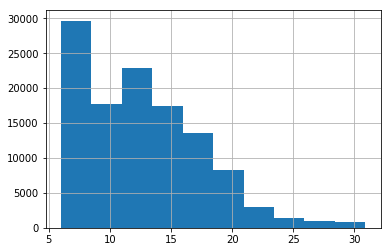

In [14]:
df['int_rate_2'].hist()

### Clean `emp_title`

Look at top 20 titles

In [15]:
df.emp_title.value_counts().head(20)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Name: emp_title, dtype: int64

In [16]:
df.emp_title.value_counts(dropna=False).head(20)

NaN                         19518
Teacher                      2037
Manager                      1626
Registered Nurse              898
Driver                        857
Supervisor                    655
RN                            623
Sales                         586
Office Manager                574
Project Manager               540
General Manager               486
Owner                         449
Director                      374
Operations Manager            313
Engineer                      309
Truck Driver                  308
Sales Manager                 288
Nurse                         281
Administrative Assistant      267
Supervisor                    260
Name: emp_title, dtype: int64

In [17]:
df['emp_title'].nunique()

39387

How often is `emp_title` null?

In [18]:
df.emp_title.isna().sum()

19518

Clean the title and handle missing values


*   Capitalize
*   Strip Spaces
*   Replace 'NaN' with missing



In [19]:
import numpy as np


example=['owner', 'Supervisor', ' Project manager', np.nan]

def clean_emp_title(x):
  if isinstance(x,str):
    return x.strip().title()
  else:
    return 'Missing'
#for ex in example:
#  print(clean_emp_title(ex))
  
[clean_emp_title(x) for x in example]

['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [20]:
df['emp_title_1']=df['emp_title'].apply(clean_emp_title) 

df['emp_title_1'].head(20)

0       Front Desk Supervisor
1          Executive Director
2              Office Manager
3               Store Manager
4                Area Manager
5                         Svp
6                 Vp Of Sales
7                       Sales
8                          Rn
9             Project Manager
10          Custom Applicator
11                 Av Manager
12    Human Resources Liaison
13                    Missing
14                      Agent
15            Sales/Marketing
16                        Ceo
17                  Route Rep
18                Maintenance
19        Executive Assistant
Name: emp_title_1, dtype: object

In [21]:
df['emp_title_1'].nunique()

31429

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [22]:
df['emp_title_manager']=df['emp_title_1'].str.contains('Manager')
df['emp_title_manager'].value_counts()


False    99713
True     15962
Name: emp_title_manager, dtype: int64

In [23]:
df['int_rate_2'].groupby(df['emp_title_manager']).mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate_2, dtype: float64

In [24]:
df.groupby('emp_title_manager').int_rate_2.mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate_2, dtype: float64

In [25]:
df.groupby('emp_title_manager').int_rate_2.mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate_2, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue_d_1']=pd.to_datetime(df['issue_d'], infer_datetime_format = True) #converting to datetime



In [27]:
df['issue_d_1'].iloc[0:5].dt.month

0    3
1    3
2    3
3    3
4    3
Name: issue_d_1, dtype: int64

In [0]:
df['earliest_cr_line_1']= pd.to_datetime(df['earliest_cr_line'])

In [29]:
df['issue_d_1']-df['earliest_cr_line_1']

0         4564 days
1         9616 days
2         5386 days
3         3377 days
4         6452 days
5         9524 days
6         6148 days
7         8705 days
8         7639 days
9        15857 days
10        4929 days
11        4383 days
12        6056 days
13        3346 days
14        6633 days
15        2219 days
16        8947 days
17        8521 days
18        4564 days
19        4595 days
20        4748 days
21        5630 days
22        3042 days
23        7213 days
24        2311 days
25        4748 days
26        5964 days
27        4717 days
28        5113 days
29        7851 days
            ...    
115645    4932 days
115646    2953 days
115647    4505 days
115648    4658 days
115649    5205 days
115650    5054 days
115651    8888 days
115652    3075 days
115653    4658 days
115654    9192 days
115655    5327 days
115656    9041 days
115657    6940 days
115658    5510 days
115659    1979 days
115660    7305 days
115661    5663 days
115662    5479 days
115663    5023 days


In [30]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col]=pd.to_datetime(df[col])

In [32]:
df.describe(include='datetime')

,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue_d_1,earliest_cr_line_1
count,115445,110769,115673,115675,115675
unique,7,3,7,3,652
top,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00,2019-01-01 00:00:00,2006-08-01 00:00:00
freq,102101,110738,111240,43584,1033
first,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,1944-01-01 00:00:00
last,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00,2019-03-01 00:00:00,2016-02-01 00:00:00


###Convert the term column from string to integer.

In [33]:
df['term'].head()

0     60 months
1     36 months
2     36 months
3     36 months
4     36 months
Name: term, dtype: object

In [34]:
df['term_2']=df.term.str.strip(' months').astype('int64')

df['term_2'].head()

0    60
1    36
2    36
3    36
4    36
Name: term_2, dtype: int64

###Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [35]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_1,int_rate_2,emp_title_1,emp_title_manager,issue_d_1,earliest_cr_line_1,term_2
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.19,17.19,Front Desk Supervisor,False,2019-03-01,2006-09-01,60
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.40,16.40,Executive Director,False,2019-03-01,1992-11-01,36
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.74,14.74,Office Manager,True,2019-03-01,2004-06-01,36
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.57,15.57,Store Manager,True,2019-03-01,2009-12-01,36
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.57,15.57,Area Manager,True,2019-03-01,2001-07-01,36


In [36]:
df['loan_status_is_great']=np.where(df['loan_status'] =='Current',1,
                             np.where(df['loan_status'] =='Fully Paid.',1,0))
df['loan_status_is_great'].sum()


109176

###Make last_pymnt_d_month and last_pymnt_d_year columns.

In [37]:
type(df['last_pymnt_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
from datetime import datetime


df['last_pymnt_d_month']=pd.to_datetime(df['last_pymnt_d']).dt.strftime('%B')
df['last_pymnt_d_month'].head()

0    June
1     May
2     May
3    June
4     May
Name: last_pymnt_d_month, dtype: object

In [39]:
df['last_pymnt_d_year']=pd.to_datetime(df['last_pymnt_d']).dt.strftime('%Y')
df['last_pymnt_d_year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: last_pymnt_d_year, dtype: object

## Stretch with LendingClub

LendingClub options:

There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.

In [40]:
df['revol_util'].isna().sum()

129

In [0]:
def remove_percent_sign1(string):
   if isinstance(string,str):
    return float(string.strip('%'))
   else:
    return 0
 

In [42]:
df['revol_util_1']=df['revol_util'].apply(remove_percent_sign1) #assuming that revolver utilization is zero if NAN
df['revol_util_1'].isna().sum()

0

Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20.

In [43]:
df.emp_title_1.value_counts().head(21)

Missing                     19518
Teacher                      2465
Manager                      2172
Registered Nurse             1306
Driver                       1194
Supervisor                   1109
Office Manager                834
Sales                         806
Truck Driver                  767
General Manager               737
Rn                            724
Owner                         695
Project Manager               688
Sales Manager                 468
Director                      467
Operations Manager            439
Administrative Assistant      412
Police Officer                385
Technician                    381
Engineer                      377
Store Manager                 366
Name: emp_title_1, dtype: int64

In [49]:

top = df['emp_title_1'].value_counts().head(21).index.tolist()
print(top)

['Missing', 'Teacher', 'Manager', 'Registered Nurse', 'Driver', 'Supervisor', 'Office Manager', 'Sales', 'Truck Driver', 'General Manager', 'Rn', 'Owner', 'Project Manager', 'Sales Manager', 'Director', 'Operations Manager', 'Administrative Assistant', 'Police Officer', 'Technician', 'Engineer', 'Store Manager']


In [0]:



def clean_emp_title2(x):
  
  if( x in top) :
      return x
  else:
      return 'Other'


In [0]:
df['emp_title_2']=df['emp_title_1'].apply(clean_emp_title2) 


In [52]:
df['emp_title_2'].value_counts().head(22)

Other                       79365
Missing                     19518
Teacher                      2465
Manager                      2172
Registered Nurse             1306
Driver                       1194
Supervisor                   1109
Office Manager                834
Sales                         806
Truck Driver                  767
General Manager               737
Rn                            724
Owner                         695
Project Manager               688
Sales Manager                 468
Director                      467
Operations Manager            439
Administrative Assistant      412
Police Officer                385
Technician                    381
Engineer                      377
Store Manager                 366
Name: emp_title_2, dtype: int64

# ASSIGNMENT

- Replicate the lesson code. 

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01